In [1]:
import numpy as np
from scipy.stats import multivariate_normal
#from numpy.random import multivariate_normal as multivariate_normal
import matplotlib.pyplot as plt

In [2]:
def phi(x, deg):
    p = np.zeros((deg+1,len(x)))

    for i in range(deg+1):
        p[i] = np.power(x,i)

    return p


def GP(x_pred,data,deg=0,sigma=0.05):
    X = data[0]
    y = data[1]

    phi_X = phi(X,deg)
    phi_pred = phi(x_pred,deg)

    A_inv = np.linalg.inv(1/sigma**2 * (phi_X @ phi_X.T) + np.eye(deg+1))

    mean = 1/sigma**2 * phi_pred.T @ A_inv @ phi_X @ y
    cov = phi_pred.T @ A_inv @ phi_pred

    w_bar = 1/sigma**2 * (A_inv @ phi_X) @ y.T

    post_dist = multivariate_normal(mean = w_bar, cov = A_inv)

    pred_dist = multivariate_normal(mean = mean,cov =cov,allow_singular=True)

    return post_dist, pred_dist

data = np.array([[-2, -1, 0, 1, 2],
                 [-1, -0.2, 0.2, 0.1, 0.5]])

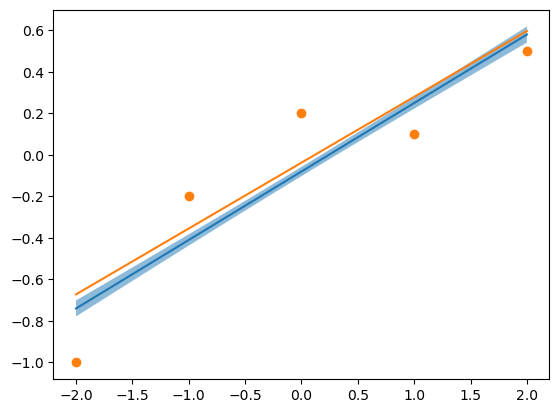

In [16]:
new_x = np.linspace(-2,2,100)

post_dist, pred_dist = GP(new_x,data,1)
plt.plot(new_x,pred_dist.mean)
std = np.sqrt(np.diag(pred_dist.cov))
plt.fill_between(new_x,pred_dist.mean-std, pred_dist.mean+std, alpha = 0.5)
plt.plot(new_x,np.random.multivariate_normal(pred_dist.mean, pred_dist.cov))
plt.scatter(data[0],data[1])

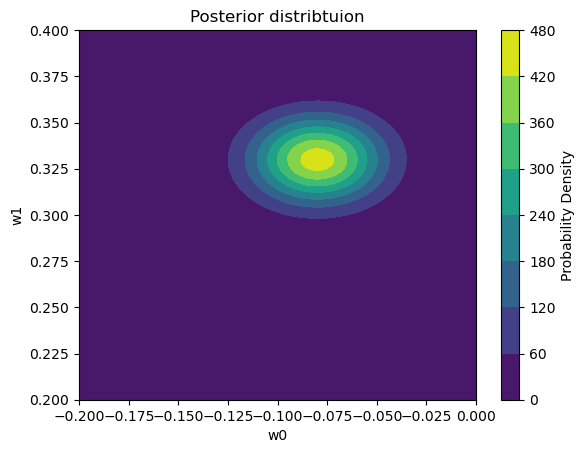

In [20]:
x, y = np.meshgrid(np.linspace(-0.2, 0, 100), np.linspace(0.2, 0.4, 100))
xy = np.column_stack([x.ravel(), y.ravel()])

# Evaluate the PDF at each point in the grid
pdf_values = post_dist.pdf(xy)

# Reshape the PDF values to match the shape of the input grid
pdf_values = pdf_values.reshape(100, 100)

# Plot the PDF as a contour plot
plt.contourf(x, y, pdf_values, cmap='viridis')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Posterior distribution')
plt.colorbar(label='Probability Density')

# Show the plot
plt.show()

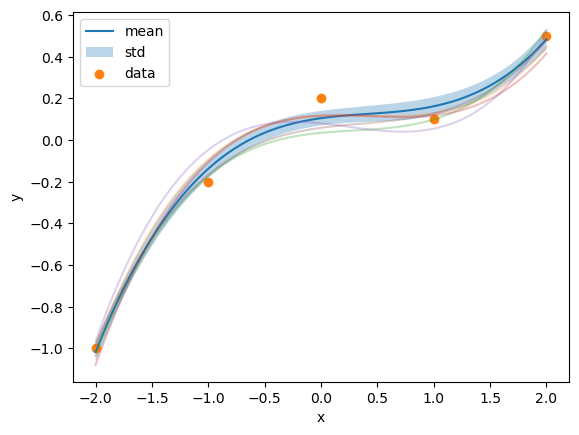

In [31]:
degree = 3

post_dist, pred_dist = GP(new_x,data,degree)
plt.plot(new_x,pred_dist.mean, label= 'mean')
plt.plot(new_x,np.random.multivariate_normal(pred_dist.mean, pred_dist.cov), alpha = 0.3)
plt.plot(new_x,np.random.multivariate_normal(pred_dist.mean, pred_dist.cov), alpha = 0.3)
plt.plot(new_x,np.random.multivariate_normal(pred_dist.mean, pred_dist.cov), alpha = 0.3)
plt.plot(new_x,np.random.multivariate_normal(pred_dist.mean, pred_dist.cov), alpha = 0.3)
plt.plot(new_x,np.random.multivariate_normal(pred_dist.mean, pred_dist.cov), alpha = 0.3)

std = np.sqrt(np.diag(pred_dist.cov))
plt.fill_between(new_x,pred_dist.mean-std, pred_dist.mean+std, alpha = 0.3, label= 'std')

plt.scatter(data[0],data[1], label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
